In [154]:
#kütüphaneleri import ettik
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression ,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [155]:
#dataframe i çağırdık bazı kolumların ismini değiştirk ve columları yazdırdık
df=pd.DataFrame()
df=pd.read_csv("veri madenciliği - Form Yanıtları 1.csv")
df=df.rename(columns={
    'Sınıfınız (2025-2026 Güz Dönemi Dahilinde)': 'sinif',
    '1005   Ayrık Matematik ve Mantık   dersini kaç kere aldınız/alıyorsunuz?': 'ders_tekrar',
    'Bu dersi çalışmak için haftada ders dışı ortalama kaç saat ayırıyorsunuz?': 'calisma_saat',
    '1005  Ayrık Matematik ve Mantık  dersinin vize sınavından kaç aldınız?': 'vize'
})
print(df.columns)

Index(['AKTS', 'haftalık_ Saat', 'Zaman damgası', 'sinif', 'ders_tekrar',
       'calisma_saat', 'vize'],
      dtype='object')


In [156]:
print(df.isnull().sum())
df=df.dropna()
print(df.isnull().sum())

AKTS              1
haftalık_ Saat    0
Zaman damgası     1
sinif             1
ders_tekrar       1
calisma_saat      1
vize              1
dtype: int64
AKTS              0
haftalık_ Saat    0
Zaman damgası     0
sinif             0
ders_tekrar       0
calisma_saat      0
vize              0
dtype: int64


In [157]:
#dataframin ilk 5 terimini yazdırdık
print(df.head())

   AKTS haftalık_ Saat   Zaman damgası  sinif  ders_tekrar  calisma_saat  vize
0   6.0              4  11/21/25 19:05    3.0          2.0           1.0  60.0
1   6.0              4  11/21/25 19:12    3.0          1.0           1.5  75.0
2   6.0              4  11/21/25 19:12    1.0          1.0           0.5  17.0
3   6.0              4  11/21/25 19:14    1.0          1.0           2.0  73.0
4   6.0              4  11/21/25 19:14    3.0          3.0           1.0  70.0


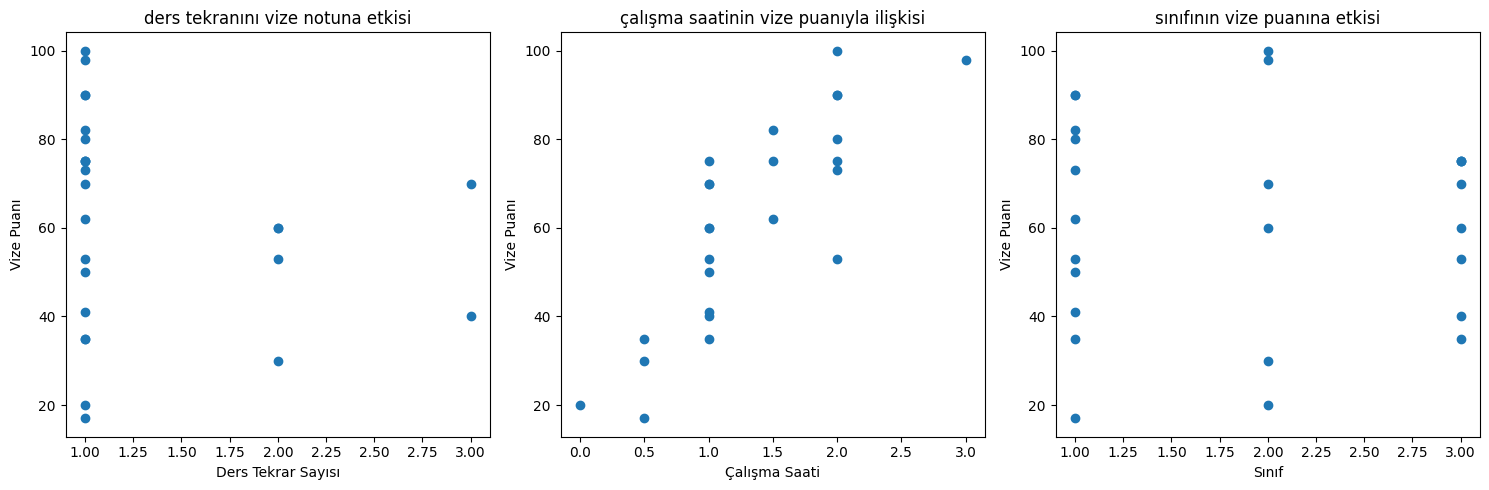

In [158]:
# vize puanı ve diğer parametrelerin ilişkisine bakıldı
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df["ders_tekrar"],df["vize"])
axes[0].set_title("ders tekranını vize notuna etkisi")
axes[0].set_xlabel("Ders Tekrar Sayısı")
axes[0].set_ylabel("Vize Puanı")

axes[1].scatter(df["calisma_saat"],df["vize"])
axes[1].set_title("çalışma saatinin vize puanıyla ilişkisi")
axes[1].set_xlabel("Çalışma Saati")
axes[1].set_ylabel("Vize Puanı")

axes[2].scatter(df["sinif"],df["vize"])
axes[2].set_title("sınıfının vize puanına etkisi")
axes[2].set_xlabel("Sınıf")
axes[2].set_ylabel("Vize Puanı")

plt.tight_layout()
plt.show()


In [159]:
#vize ve çalışma saatlerinin ortalamsı alındı ders tekrarının ve sınıfın medianını aldık
mean_vize=df["vize"].mean()
mean_calısma_saat=df["calisma_saat"].mean()
mean_ders_tekrar=df["ders_tekrar"].median()
mean_sinif=df["sinif"].median()

print("ortalama sınıf",mean_sinif)
print("alınıan tekrar sayısı",mean_ders_tekrar)
print("ortalama vize :",mean_vize)
print("ortalama çalışma: ",mean_calısma_saat)

ortalama sınıf 2.0
alınıan tekrar sayısı 1.0
ortalama vize : 61.36
ortalama çalışma:  1.32


In [160]:
correlation = df["calisma_saat"].corr(df["vize"])
print("\nKorelasyon:", correlation)


Korelasyon: 0.825185860997334


In [161]:
X=df[['haftalık_ Saat',"sinif","ders_tekrar","calisma_saat","AKTS"]]
y=df["vize"]

<Axes: >

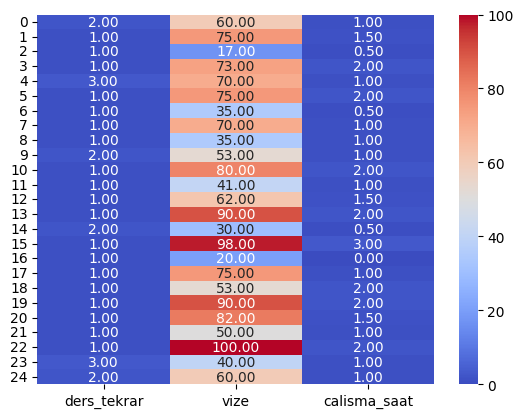

In [162]:
cor_matrix=df[["ders_tekrar","vize","calisma_saat"]]
plt.Figure(figsize=(12,8))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm', fmt=".2f")

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 ,random_state=42)
model_liner=LinearRegression()
model_liner.fit(X_train,y_train)
y_pread=model_liner.predict(X_test)

print("tahminler :",y_pread)

tahminler : [62.77084781 29.26302988 62.11605281 61.46125782 50.08182766]


In [164]:
print("Intercept: ",model_liner.intercept_)
print("katsayılar: ",model_liner.coef_)

Intercept:  17.228804725503792
katsayılar:  [ 0.          6.34451008 -0.654795   27.16330785  0.        ]


In [165]:
print("R²:", r2_score(y_test, y_pread))
print("Hata (MSE):", mean_squared_error(y_test, y_pread))
print("mean: ",mean_absolute_error(y_test,y_pread))


R²: -0.707057086759139
Hata (MSE): 280.91331419708393
mean:  13.938603196664346


In [166]:
model_elestic=Pipeline([
    ("scaler",StandardScaler()),
    ("elastic",ElasticNet(alpha=0.1, l1_ratio=0.5))
])
model_elestic.fit(X_train,y_train)

y_pread_elastic=model_elestic.predict(X_test)
print("tahminler",y_pread_elastic)


tahminler [63.01264319 31.42343567 62.07586043 61.13907767 51.13783038]


In [167]:
elestic_model=model_elestic.named_steps["elastic"]
print("İntercept",elestic_model.intercept_)
print("katsayılar: ",elestic_model.coef_)

İntercept 66.9
katsayılar:  [ 0.          4.92303732 -0.5022938  16.67367073  0.        ]


In [168]:
print("R2: ",r2_score(y_test,y_pread_elastic))
print("hata (MSE): ",mean_absolute_error(y_test,y_pread_elastic))
print("mean :",mean_squared_error(y_test,y_pread_elastic))

R2:  -0.7855474809596101
hata (MSE):  14.557769469936881
mean : 293.8296934667135


In [169]:
model_rf=RandomForestRegressor()
model_rf.fit(X_train,y_train)

y_pread_random=model_rf.predict(X_test)
print("tahminler: ",y_pread_random)

tahminler:  [72.33       32.97       57.4        64.9        57.30333333]


In [170]:
print("R2 :",r2_score(y_test,y_pread_random))
print("hata (MSE): ",mean_absolute_error(y_test,y_pread_random))
print("mean: ",mean_squared_error(y_test,y_pread_random))

R2 : -1.9828858504834437
hata (MSE):  18.820666666666668
mean:  490.8636955555556


In [172]:
#tahmini değerlere göre 4 kşinin alacağı puanı hesaplıyor
hours = np.array([
    [4,mean_sinif,mean_ders_tekrar,0.5,6], 
    [4,mean_sinif,mean_ders_tekrar,1.0,6], 
    [4,mean_sinif,mean_ders_tekrar,1.5,6],
    [4,mean_sinif,mean_ders_tekrar,2.0,6]])
tahmin_linear = model_liner.predict(hours)
tahmin_elastic = model_elestic.predict(hours)
tahmin_rf = model_rf.predict(hours)


print(tahmin_linear)
print(tahmin_elastic)
print(tahmin_rf)



[42.84468381 56.42633773 70.00799166 83.58964559]
[44.24933623 57.07523679 69.90113735 82.72703791]
[32.97       69.04       77.74845238 92.89346429]
